## **Deploy: problema de regressão**

\begin{equation}
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
\end{equation}

Onde:

- $Y$: variável resposta
- $\beta_i$: coeficientes
- $X_i$: variáveis preditoras

---

<br>

**Deploy**: última etapa da metodologia CRISP-DM (modelo em produção)

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/Crisp-dm.png?raw=true" width="400px"/>


**PROBLEMA DE NEGÓCIO**

Uma empresa de marketing digital deseja otimizar seus investimentos em publicidade em diferentes canais (TV, rádio e jornal) para maximizar as vendas de seus produtos. A empresa possui dados históricos sobre o investimento em cada canal e as vendas correspondentes.


> **Objetivo:** utilizar técnicas de Machine Learning para construir um modelo preditivo que estime as vendas futuras com base nos investimentos em publicidade.


Metadados do dataset a ser utilizado:

- `TV`: investimento em publicidade em televisão para um determinado produto ou campanha (USD)
- `Radio`:  investimento em publicidade em rádio (USD).
- `Newspaper`: investimento em publicidade em jornais (USD).
- `Sales`:  resultado final da campanha publicitária, ou seja, as vendas geradas.


> \begin{equation}
  \textrm{Sales} = \beta_0 + \beta_1 * \textrm{TV} + \beta_2 * \textrm{Radio} + \beta_3 * \textrm{Newspaper}
\end{equation}

Deploy de Web App com [**Streamlit**](https://docs.streamlit.io/):
* https://predictsales.streamlit.app/

Exemplos:
* https://dataprofessor-ml-app-ml-app-suh248.streamlit.app/
* https://movies-explorer.streamlit.app/
* https://ahmedbesbes-playground-app-lzztm8.streamlit.app/
* https://br-realestate-valorization.streamlit.app/
* [Templates](https://share.streamlit.io/new/deploy-from-template/b8e65aff-d8c7-4b7d-9d4c-eb79249dfc4b) (precisa estar logado na cloud do Streamlit)

In [ ]:
# Bibliotecas:

# -- Manipulação de dados:
import numpy as np
import pandas as pd

# -- Visualização:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.plotting.backend = 'plotly'

# Modelagem:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics as m

In [ ]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/campanhas_publicidade.csv' -O 'campanhas_publicidade.csv'

In [ ]:
dados = pd.read_csv('campanhas_publicidade.csv')
dados.head(3)

,TV,Radio,Newspaper,Sales,Label
0,230.1,37.8,69.2,22.1,Sales
1,44.5,39.3,45.1,10.4,Sales
2,17.2,45.9,69.3,12.0,Sales


In [ ]:
dados.shape

(200, 5)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
 4   Label      200 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dados['Label'].unique()

array(['Sales', 'Branding'], dtype=object)

In [ ]:
objetivo_campanhas = dados.groupby('Label', as_index=False)['Label'].count().sort_values('Label', ascending=False)
objetivo_campanhas = objetivo_campanhas.rename(columns={'Label': 'count'})
objetivo_campanhas['Relative Freq'] = objetivo_campanhas['count'] / objetivo_campanhas['count'].sum() * 100
objetivo_campanhas['Acum Freq'] = objetivo_campanhas['Relative Freq'].cumsum()
objetivo_campanhas.style.background_gradient(subset='Acum Freq')

,count,Relative Freq,Acum Freq
1,132,66.000000,66.000000
0,68,34.000000,100.000000


In [ ]:
dados[['TV']].boxplot(width=400, height=400, template='simple_white')

In [ ]:
dados[['Radio']].boxplot(width=400, height=400, template='simple_white')

In [ ]:
dados[['Newspaper']].boxplot(width=400, height=400, template='simple_white')

In [ ]:
dados[['Sales']].boxplot(width=400, height=400, template='simple_white')

In [ ]:
dados = dados.query('Newspaper < 100')
dados.shape

(198, 5)

In [ ]:
# Estatísticas descritivas:
descritivas = dados.describe().T
descritivas['cv'] = descritivas['std'] / descritivas['mean']
descritivas

,count,mean,std,min,25%,50%,75%,max,cv
TV,198.0,146.688384,85.443221,0.7,74.800,149.75,218.475,293.6,0.582481
Radio,198.0,23.130808,14.862111,0.0,9.925,22.40,36.325,49.6,0.642525
Newspaper,198.0,29.777273,20.446303,0.3,12.650,25.60,44.050,89.4,0.686641
Sales,198.0,15.100000,5.271184,1.6,11.000,16.00,18.975,27.0,0.349085


<Axes: >

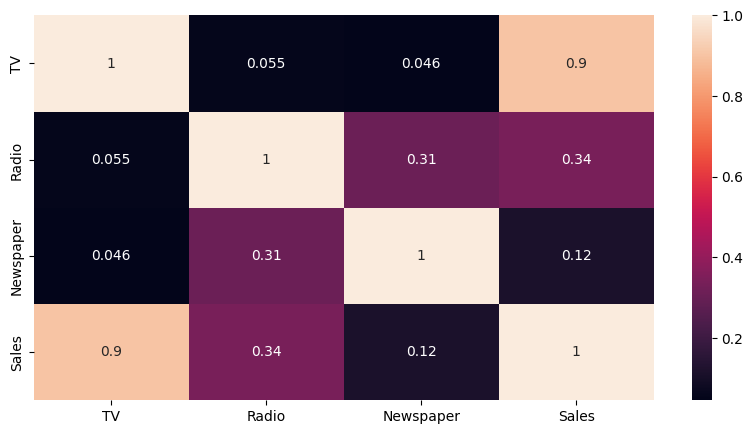

In [ ]:
correlacoes = dados.select_dtypes(include='number').corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(correlacoes, annot=True)

Em relação ao `Sales`:
* Correlação forte ($r \geq 0.7$): `TV`
* Correlação fraca ($0.3 \geq r < 0.5$): `Radio`
* Correlação muito fraca ($r < 0.3$): `Newspaper`

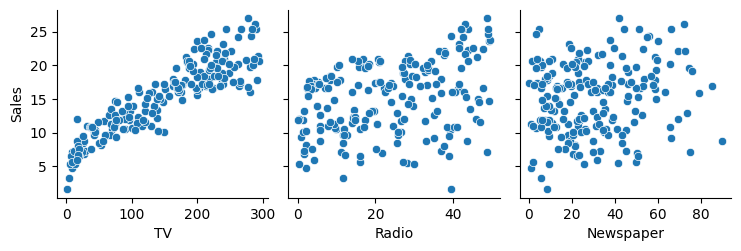

In [ ]:
sns.pairplot(dados, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

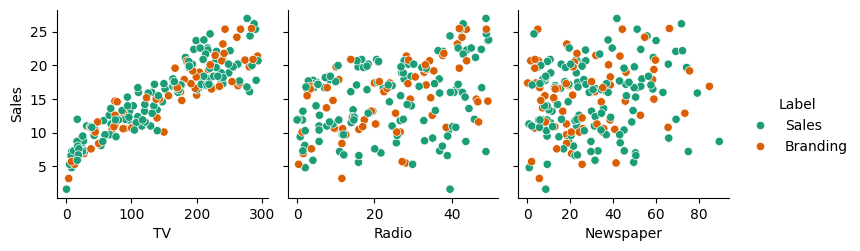

In [ ]:
sns.pairplot(dados, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', hue='Label', palette='Dark2')

In [ ]:
# exportando os dados originais (pensnado no deploy):
dados.to_csv('notebooks_streamlit_data.csv', index=False)

In [ ]:
# Codificação
dados = pd.get_dummies(dados, columns=['Label'])
dados = dados.replace(False, 0).replace(True, 1)
dados.head()

,TV,Radio,Newspaper,Sales,Label_Branding,Label_Sales
0,230.1,37.8,69.2,22.1,0,1
1,44.5,39.3,45.1,10.4,0,1
2,17.2,45.9,69.3,12.0,0,1
3,151.5,41.3,58.5,16.5,0,1
4,180.8,10.8,58.4,17.9,1,0


In [ ]:
# Dados fictícios
features = dados.drop('Sales', axis=1)
resposta = dados[['Sales']]

# Dividindo os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(features, resposta, test_size=0.2, random_state=42)

print('Tamanho dos dados de treino/teste (linhas, colunas):')
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

Tamanho dos dados de treino/teste (linhas, colunas):
(158, 5)
(40, 5)
(158, 1)
(40, 1)


In [ ]:
# Dados fictícios
scaler = StandardScaler()

# Normalização
x_treino['TV'] = scaler.fit_transform(x_treino[['TV']])
x_treino['Radio'] = scaler.fit_transform(x_treino[['Radio']])
x_treino['Newspaper'] = scaler.fit_transform(x_treino[['Newspaper']])

x_teste['TV'] = scaler.fit_transform(x_teste[['TV']])
x_teste['Radio'] = scaler.fit_transform(x_teste[['Radio']])
x_teste['Newspaper'] = scaler.fit_transform(x_teste[['Newspaper']])

In [ ]:
x_treino.head(2)

,TV,Radio,Newspaper,Label_Branding,Label_Sales
139,0.426752,1.391952,-1.351879,1,0
5,-1.625660,1.724944,2.155435,0,1


In [ ]:
y_treino.head(2)

,Sales
139,20.7
5,7.2


In [ ]:
# Treinamento do modelo
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

predicoes_teste = modelo.predict(x_teste)
predicoes_teste[0:5]

array([[ 9.01578303],
       [13.89150193],
       [25.11447031],
       [11.3139478 ],
       [ 9.57123923]])

In [ ]:
y_teste.head()

,Sales
66,11.0
116,12.2
17,24.4
143,10.4
158,7.3


In [ ]:
rmse = (m.mean_squared_error(y_teste, predicoes_teste))**(1/2)
r2 = m.r2_score(y_teste, predicoes_teste)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 1.5490219552623465
R²: 0.9135858977752526


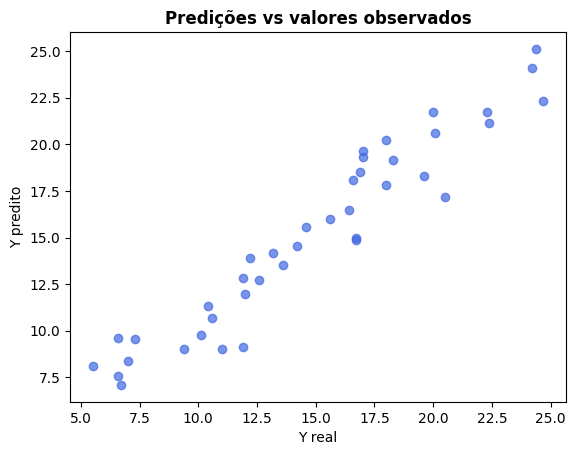

In [ ]:
# Predições
fig, ax = plt.subplots()
plt.plot(y_teste, predicoes_teste, 'o', color='royalblue', alpha=0.7);
plt.title('Predições vs valores observados', weight='bold');
plt.xlabel('Y real');
plt.ylabel('Y predito');

In [ ]:
# Exportando o modelo:
import pickle

with open('modelo_regressao_00.pkl', 'wb') as file:
  pickle.dump(modelo, file)

<ipython-input-274-6c9e4e722fd1>:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



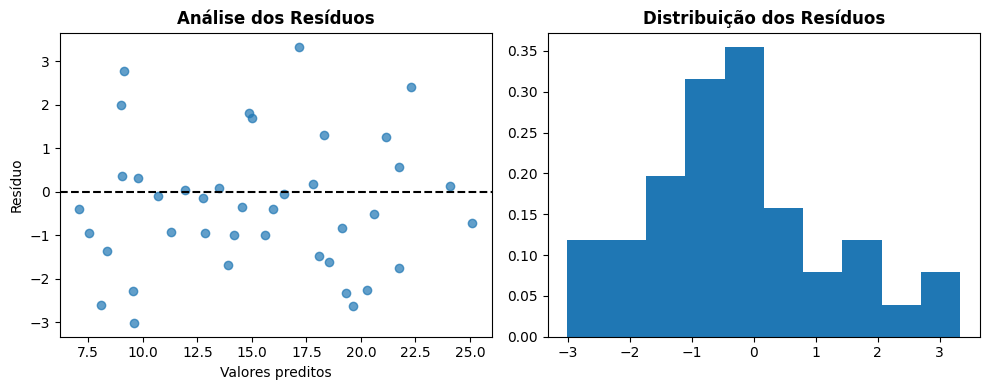

In [ ]:
residuos = y_teste - predicoes_teste

fig, ax = plt.subplots(figsize=(10,4));

# Sub-gráfico 1:
plt.subplot(1,2,1);
plt.title('Análise dos Resíduos', weight='bold')
plt.plot(predicoes_teste, residuos, 'o', alpha=0.7);
plt.axhline(y=0, lw=1.5, ls='--', color='black');
plt.xlabel('Valores preditos')
plt.ylabel('Resíduo')

# Sub-gráfico 2:
plt.subplot(1,2,2);
plt.title('Distribuição dos Resíduos', weight='bold')
plt.hist(residuos, density = True, histtype ='barstacked');
plt.tight_layout();
plt.savefig('performance.png', dpi=300)

In [ ]:
# Criar DataFrame para predição
label = 'sales'

input_data = pd.DataFrame({
    'TV': [70],
    'Radio': [80],
    'Newspaper': [50],
    'Label_Branding': [1 if label == "Branding" else 0],
    'Label_Sales': [1 if label == "Sales" else 0]
})

# Criar scaler
scaler = StandardScaler()
scaler.fit(dados[['TV', 'Radio', 'Newspaper']])

# Aplicar o escalonamento aos dados de entrada
input_data[['TV', 'Radio', 'Newspaper']] = scaler.transform(input_data[['TV', 'Radio', 'Newspaper']])

input_data

,TV,Radio,Newspaper,Label_Branding,Label_Sales
0,-0.899811,3.836154,0.991572,0,0


In [ ]:
with open('modelo_regressao_00.pkl', 'rb') as file:
    modelo_regressao = pickle.load(file)

predicoes = modelo_regressao.predict(input_data)
predicoes = int(predicoes)

<ipython-input-277-54108b8a3746>:5: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
print(f'Vendas: {predicoes}')

Vendas: 16
